In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(x):
    F = np.sin(2 * np.pi * x) * np.cos(5 * np.pi * x)*np.exp(x) - 2*np.cos(7*np.pi*x)*np.sin(np.pi*x)
    return F

In [3]:
def gaussian(x1, x2, l = 1/9):
    f = np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * l ** 2))
    return f

In [4]:
N = 12
R=0.5
e = 1.25*R / np.sqrt(N)

In [5]:
def multiquadratic(x1,x2):
  F = (e**2+(x1-x2)**2)**(-1/2)

  return F

In [6]:
def multiquadratic2(x1,x2):
  d= x1-x2
  if d.ndim ==1:
    d=np.expand_dims(d,axis=1)
  F = (e**2+np.linalg.norm(d,axis=1)**2)**(-1/2)

  return F

In [7]:
def kernel_matrix(X,  f = multiquadratic):
    G = np.zeros([len(X), len(X)])
    for i in range(len(X)):
        for j in range(len(X)):
            G[i, j] = f(X[i], X[j])
    return G

In [8]:
def rbf_model(G, d):
    m = np.dot(np.linalg.inv(G), d)
    return m

In [9]:
def rbf_predict(x, X, m,  f = multiquadratic2):

    S = np.zeros(len(x))
    for i in range(len(m)):
        S = S + m[i] * f(x, X[i])
    return S

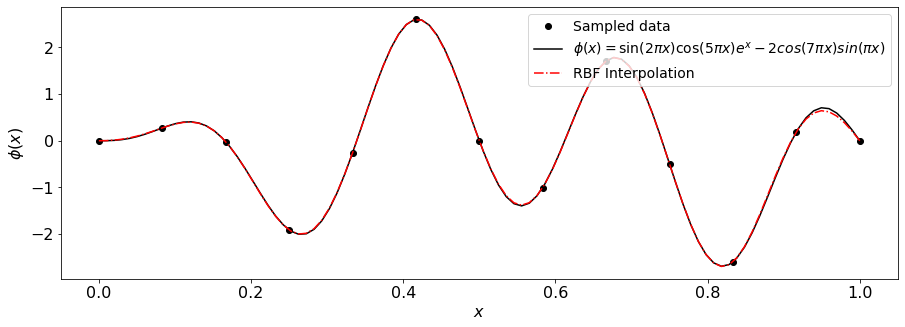

In [10]:
# Sample 10 values of X and phi.

X = np.arange(0, N + 1, 1) / N
d = phi(X)
# Gaussian length scale.
L = 1 / 9
# Calculate the kernel matrix G
G = kernel_matrix(X,  multiquadratic)

# Invert d = Gm for the model parameters.
m = rbf_model(G, d)
# Using m, interpolate phi for all values in x ∈ [0, 1].
x = np.linspace(0, 1, 100)
S = rbf_predict(x, X, m,  multiquadratic2)
# Plot the results.
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, S, "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)e^x-2cos(7\pi x)sin(\pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [11]:
from scipy.interpolate import Rbf

In [12]:
print(len(X))
print(len(d))

13
13


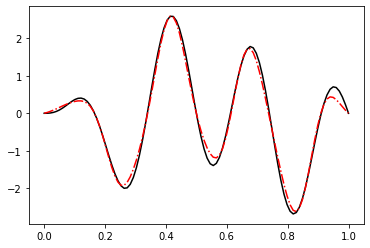

In [13]:
l_x = Rbf(X,d,function='inverse')
pred = l_x(x)
plt.plot(x, phi(x), "k")
plt.plot(x, pred, "r-.") 

In [14]:
x.ndim

1

In [15]:
y1 = np.linspace(0,1,10)
y2= np.linspace(0,1,4)
y2

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [16]:
z1,z2 = np.meshgrid(y1,y2)
z1 = z1.flatten()[:, None]
z2 = z2.flatten()[:, None]
z = np.concatenate([z1,z2],axis=1)
z

array([[0.        , 0.        ],
       [0.11111111, 0.        ],
       [0.22222222, 0.        ],
       [0.33333333, 0.        ],
       [0.44444444, 0.        ],
       [0.55555556, 0.        ],
       [0.66666667, 0.        ],
       [0.77777778, 0.        ],
       [0.88888889, 0.        ],
       [1.        , 0.        ],
       [0.        , 0.33333333],
       [0.11111111, 0.33333333],
       [0.22222222, 0.33333333],
       [0.33333333, 0.33333333],
       [0.44444444, 0.33333333],
       [0.55555556, 0.33333333],
       [0.66666667, 0.33333333],
       [0.77777778, 0.33333333],
       [0.88888889, 0.33333333],
       [1.        , 0.33333333],
       [0.        , 0.66666667],
       [0.11111111, 0.66666667],
       [0.22222222, 0.66666667],
       [0.33333333, 0.66666667],
       [0.44444444, 0.66666667],
       [0.55555556, 0.66666667],
       [0.66666667, 0.66666667],
       [0.77777778, 0.66666667],
       [0.88888889, 0.66666667],
       [1.        , 0.66666667],
       [0.

In [17]:
print(np.linalg.norm(z,axis=1))

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.         0.33333333 0.35136418
 0.40061681 0.47140452 0.55555556 0.64788354 0.74535599 0.84619701
 0.94933375 1.05409255 0.66666667 0.6758625  0.70272837 0.74535599
 0.80123362 0.86780552 0.94280904 1.02439383 1.11111111 1.20185043
 1.         1.0061539  1.02439383 1.05409255 1.09431753 1.1439589
 1.20185043 1.26686158 1.33795495 1.41421356]


In [18]:
ndim=1
M =G
temp = np.ones(N+1)
temp = np.expand_dims(temp,axis=1)
xx = np.expand_dims(X,axis=1)
M=np.concatenate([M,xx,temp],axis=1)
temp = np.concatenate([xx,temp],axis=1)
temp = np.transpose(temp)
null = np.zeros((ndim+1,ndim+1))
temp = np.concatenate([temp,null],axis=1)
M = np.concatenate([M,temp],axis=0)
temp.shape

(2, 15)

In [19]:
dd = d
for i in range(ndim+1):
  dd=np.append(dd,0)
dd.shape
abc=np.dot(np.linalg.inv(M), dd)
a = abc[:N+1]
a.shape
b = abc[N+1:N+ndim+1]
c = abc[-1]

In [20]:
c

0.3430098665972637

In [21]:
def predict(x, X, a,b,c,  f = multiquadratic2):
    S = np.array([np.dot(b,x[i])+c for i in range(len(x))])
    S=np.squeeze(S)
    for i in range(len(a)):
        S = S + a[i] * f(x, X[i])
    print(S.shape)
    return S

(100,)


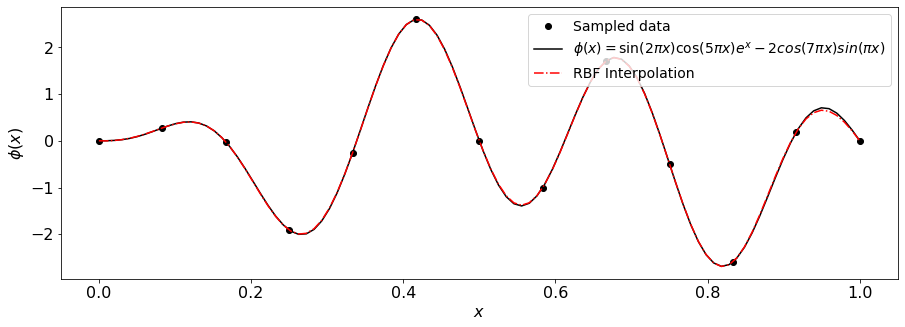

In [22]:
SS = predict(x, X, a,b,c,  multiquadratic2)
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, SS, "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)e^x-2cos(7\pi x)sin(\pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()